COMP2200 - Brianna Lindsay 45428239

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

If the below cell gives error in `tz_localize`, use `tz_convert` as Pandas is time zone aware. 

In [2]:
# make strava dataframe
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('Australia/Sydney')
strava

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-03 07:47:51+11:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 12:36:53+11:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 13:56:00+11:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 16:37:04+11:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-06 06:22:46+11:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride
...,...,...,...,...,...,...,...,...,...,...
2019-07-20 06:22:49+10:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride
2019-07-27 06:12:56+10:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride
2019-07-28 06:42:59+10:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
# make cheater dataframe
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.754520,16.6520,1.31920,1.67755,223.621,0.834410,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.843430,80.2669,1.21137,1.54250,246.185,0.918600,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.000000,0.0000,0.00000,0.00000,0.000,0.000000,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.827140,78.8866,1.35775,1.86002,254.409,0.949290,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.814220,159.4590,1.47188,1.74658,233.780,0.872310,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-20 06:22:49+10:00,07/20/19,06:22:49,2019_07_20_06_22_49.json,204.799,0.764175,140.7350,1.24317,0.00000,222.990,0.832052,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-27 06:12:56+10:00,07/27/19,06:12:56,2019_07_27_06_12_56.json,209.935,0.783340,151.5300,1.28248,1.74567,236.254,0.881543,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-28 06:42:59+10:00,07/28/19,06:42:59,2019_07_28_06_42_59.json,193.017,0.720214,42.8943,1.19066,1.58605,212.345,0.792332,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-28 07:47:24+10:00,07/28/19,07:47:24,2019_07_28_07_47_24.json,251.993,0.940274,74.0446,1.07162,1.74483,268.022,1.000080,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


The GoldenCheetah data contains many many variables (columns) and we won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

##### Justification for inner join
inorder to combined the datasets an inner join was used to ensure that our data only has rows with all data available in all columns. 

In [4]:
# join dataframes
df1= strava.join(cheetah, rsuffix= 'cheeter',how= 'inner')
df1

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-28 07:01:32+11:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-02-01 08:13:34+11:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-06 08:06:42+11:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 17:59:05+11:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-20 06:22:49+10:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-27 06:12:56+10:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-28 06:42:59+10:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-28 07:47:24+10:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).
* We want to explore relationship between `rides` and `weather`. In order to carry out this analysis, you need `weather` data from relevant source. For your convenience, we have downloaded temperature data from [Bureau of Meterology](http://www.bom.gov.au/). You can find temperature under `Maximum temperature (Degree C)` column which represents maximum temperature for the day. Under the `data` directory, you get `weather_data_2018.csv` and `weather_data_2019.csv` files from where you can read daily temperatures. In order to get temperature for a day so that you can use in your combined dataframe (joining Strava and Cheetah datasets), you need to make `date` column consistent in both dataframes. 
    * Make `date` column consistent across both `weather` and `rides` datasets so that you can get `Maximum temperature` for the day of the ride. 
    * Can you find any relationship between distance travelled per ride and the temperature?
    * Can you find any relatioship between Average speed of ride and the temperature?


## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.


### question 1 
Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
   * df.head is used to show that df no longer included data where device watts == false

In [5]:
# remove data that has no device watts
df = df1.drop(df1.index[(df1.device_watts == False)])
df.tail()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2019-07-20 06:22:49+10:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-27 06:12:56+10:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-28 06:42:59+10:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-28 07:47:24+10:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620
2019-07-28 09:55:13+10:00,109.6,15.0,114.7,True,20.2,68,280.00 m,6,59,Ride,...,0,0,0,0,0,0,0,163.001,0.608214,36.6945


### question 2
Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed?

##### variable time - time spent resting waiting at lights
As shown in the plot below time is positive skewed, with two peaks, with no outliers,this makes it not normally distributed.

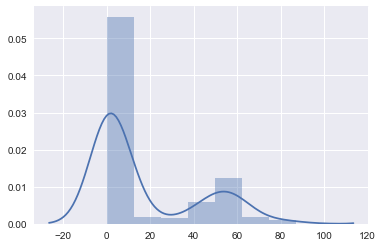

In [6]:
# create histogram
sns.distplot(df.elapsed_time-df.moving_time)

##### variable time - time spent moving
As shown in the plot below this time moving is very weakly positvely skewed with two peaks close together, this makes the data very close to normally distributed.

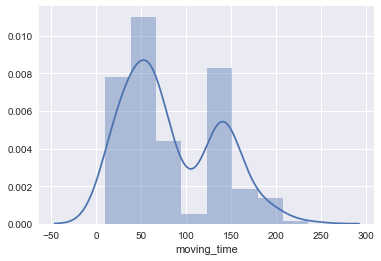

In [7]:
# create histogram
sns.distplot(df.moving_time)

##### variable time - total time (time spent moving + time resting or waiting)
As shown in the plot below this variable is total time has very clustered data, with no skew but two peaks contaning a large proportion of the data.

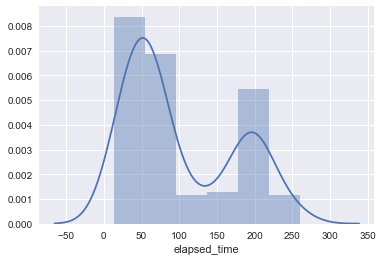

In [8]:
# create histogram
sns.distplot(df.elapsed_time)

##### variable distance
As shown in the plot below distance has a weak positively skew with a short tail as majority of the data is clustered around similar values.

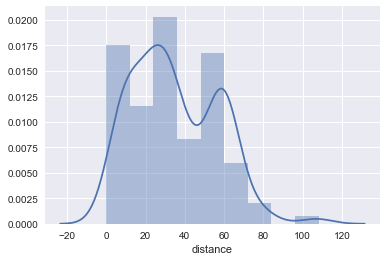

In [9]:
# create histogram
sns.distplot(df.distance)

##### variable average speed
 * average speed was calculate by dividing distance by elapsed time
 
As shown in the plot below this average speed has a weak negitive skew, as most of the data is clustered together with a few bins to the left of the main data.

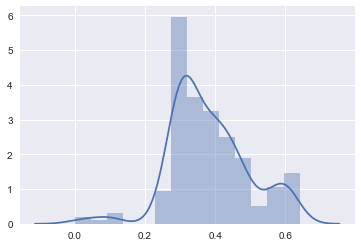

In [10]:
# create histogram 
sns.distplot(df.distance/df.elapsed_time)

##### variable average power
As shown in the plot below this average power is close to being normally distibuted as it doesnt have any outliers or any significant skew.

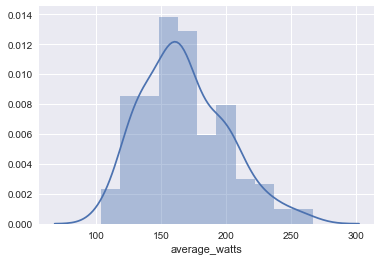

In [11]:
# create histogram
sns.distplot(df.average_watts)

##### variable TSS
As shown in the plot below this variable is siginifcantly positively skewed due to a outlier.

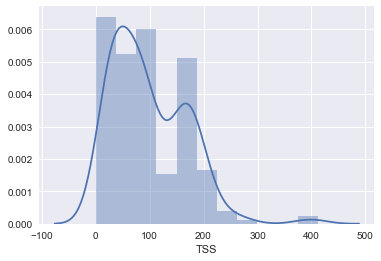

In [12]:
# create histogram
sns.distplot(df.TSS)

### question 3
Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe? 
* Distance
* Moving Time
* Average Speed
* Heart Rate
* Power (watts)
* Normalised power (NP)
* Training Stress Score
* Elevation Gain

##### Heat map - correlation
As shown in the plot below there are significant correlaton between time moving & distance, TSS & distance, Average power & NP and Average power & average speed as all of them are above 0.8 correlation. intrestingly a significant proporting of the data have very weak correlation coefficeint specifically average heart rate and TSS (measuring how hard a ride was), logically these two would correlate positively, as we expect heart rate would be higher on harder rides.

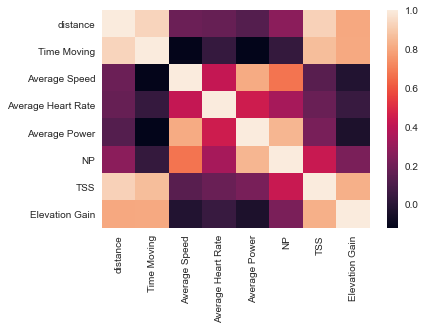

In [13]:
# seperate data into features of focus and their correlation socres
cor = df[['distance','Time Moving', 'Average Speed', 'Average Heart Rate','Average Power','NP','TSS','Elevation Gain']].corr()
# create heat map
sns.heatmap(cor)

### question 4
We want to explore the differences between the three categories: Race, Workout and Ride.
Use scatter plots with different colours for each category to explore how these categories differ.


##### Scatter plot 
###### distance vs time moving
As shown in the plot below all three categories have distinct positive linear trends, as distance goes up so does time moving. however we can see that ride differs the most from its linear relation as it has the largest residules, specifically with the lower distance range(0-20).

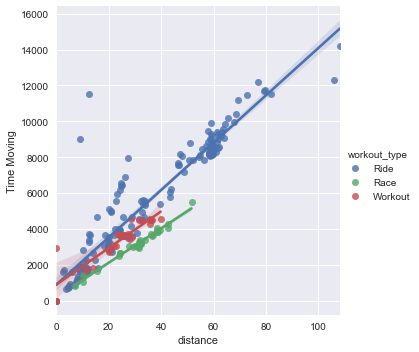

In [14]:
# create scatter plot
sns.lmplot(x= 'distance',y='Time Moving',data=df1,hue= 'workout_type')

###### distance vs TSS
this relationship has less of a positive linear relationship as there are significant residules as shown in the wide spread of data from line of best fit, as TSS goes up we can see the ride line is less of a good predictor. race and work out are both predictable using the minear line as the data usually falls upon the line. 

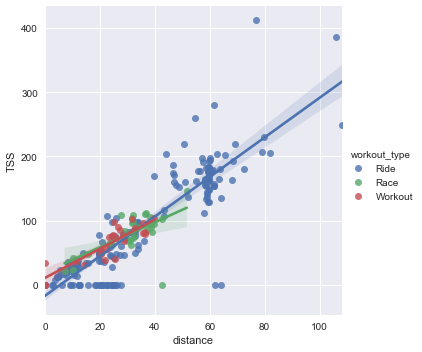

In [15]:
# create scatter plot
sns.lmplot(x= 'distance',y='TSS',data=df1,hue= 'workout_type')

###### Average power vs NP
all three categories have similar lines of best fit, this imples that there are little differences between the categories. ride however differes the most from its line of best fit as it has the highest residueles. race and work out are more predictable.  we can also see that the data is centralised to a range of data (100-275). all three lines have a positive linear relationship.

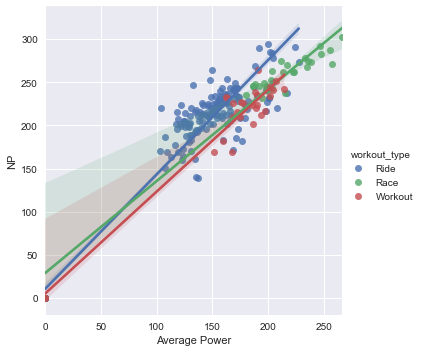

In [16]:
# create scatter plot
sns.lmplot(x= 'Average Power',y='NP',data=df1,hue= 'workout_type')

###### Average power vs Average speed
while all likes are very accurate with minimal residuales we can see that ride and workout are both posive linear relationships, while race has a negitive linear relationship. we can also see that the data is centralised to specific range for ride and workout (100-250), while races data is centralised above that indicating a higher average power & average speed than the other two categories

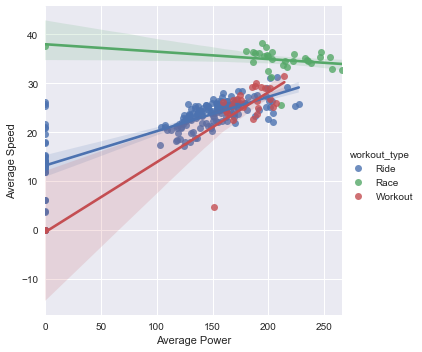

In [17]:
# create scatter plot
sns.lmplot(x= 'Average Power',y='Average Speed',data=df1,hue= 'workout_type')

#### Histograms / box plots
Use histograms or box plots to visualise the different distributions of a variable for the three categories.

In [18]:
# seperate dataframes by workout type
mask = df['workout_type'] =='Ride'
ride = df[mask]
mask1 = df['workout_type'] =='Workout'
workout = df[mask1]
mask2 = df['workout_type'] =='Race'
race = df[mask2]

##### Distance

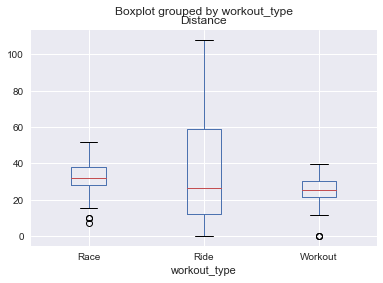

In [19]:
# create boxplot
dfboxplot = df1.boxplot(column=['Distance'], by= 'workout_type')

this box plot shows that workout type ride has the most varience when compared to Race & workout, furthermore Race and workout are both very condenced with small interquartile range, simetrical upper & lower quartiles and outliers in the low range. all have similar medians, this implies that Race and Workout could be normally distributed.

this is further backed up by the histogram below, where we can see both race and and ride are almost normally distributed as they dont have any significant skew or second peaks. we can also see the extent of the varability of work out as the bins are less filled and are spread over a wider range of bins than the other two workout types.

the plots indicate little difference between workout & race as there ranges are similar, ride differs the most as it varies more significantly and has 25% of its data above race and workout. with all three categories having similar medians

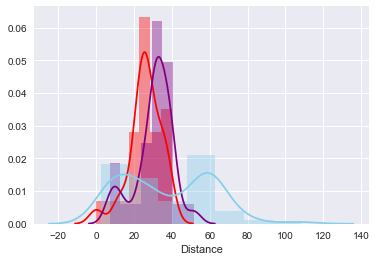

In [20]:
sns.distplot(workout['Distance'],color= 'red')
sns.distplot(race['Distance'],color= 'purple')
sns.distplot(ride['Distance'],color= 'skyblue')

##### Time Moving

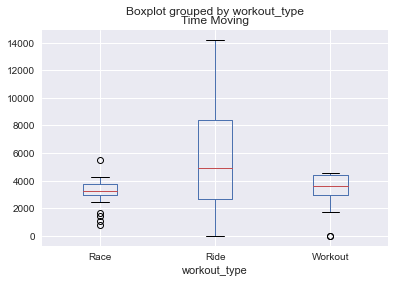

In [21]:
# create boxplot
dfboxplot = df1.boxplot(column=['Time Moving'], by= 'workout_type')

as shown in the box plots above the variable time moving is similar to distance, with ride having the most variance and no outliers. however race has alot of outliers, but it is symetrical. when looking at workout we can see the upper quartile is significantly shorter than the other quartiles, and has one lower outlier. 

the histogram below shows us the frequency distribution of our catagories, we can see Workout and Race are similarly distributed, with no skew and high peaks, while ride has alot of variance and 2 small peaks with no skew.

when the catagories are compared to each other we are told similar things to distance. with workout & race being almost identically distributed and workout varying more than the other two, all the data has similar medians.

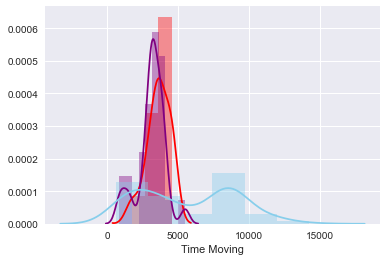

In [22]:
sns.distplot(workout['Time Moving'],color= 'red')
sns.distplot(race['Time Moving'],color= 'purple')
sns.distplot(ride['Time Moving'],color= 'skyblue')

##### TSS - Training Stress Score

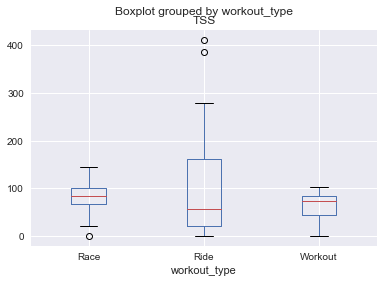

In [23]:
# create boxplot
dfboxplot = df1.boxplot(column=['TSS'], by= 'workout_type')

when looking at the TSS distribution shape, race could be normally distributed as it is symetrical, however it does have a lower outlier. ride is positivly skewed, with a significantly longer upper tail with 2 outliers that differ greatly from the rest of the data. while workout has a slightly negitve skew as the lower tail is extended, and inner upper quartile range is narrow, meaning the median is not directly in the center of the data.

however when we look at the histograms we can see that race is not normally distributed as it has 2 peaks and a slight negitive skew, ride is almost normally distributed as it isnt skewed and has a even peak. finally ride has two peaks and has a significant variance as previsously mentioned.

there is little difference between the median of all three categories, however the distribution of ride varies more significantly than workout and race.

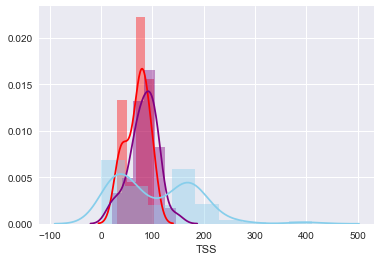

In [24]:
# create histogram
sns.distplot(workout['TSS'],color= 'red')
sns.distplot(race['TSS'],color= 'purple')
sns.distplot(ride['TSS'],color= 'skyblue')

##### Average Power

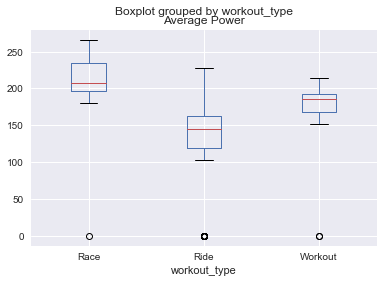

In [25]:
# create boxplot
dfboxplot = df1.boxplot(column=['Average Power'], by= 'workout_type')

the box plots above tell us that this data hasnt been cleaned as all categories have outliers at 0. race is positively skewed as the lower 50% is condenced significantly more than the upper 50%.  ride is similar, work out is more symetrically with its upper and lower quartiles however its upper inner quartile is small implying a large portion of data in a small area, otherwise known as a peak. 

however when looking at the histograms we can see that race has a positce skew, with ride also having a positive skew and workout being almost normally distriuted as it has one large peak and the data being symetrical distributed after it.

when comparing the catagories its clear that ride has the lowest median average power, with race just having a slightly higher median average power over workout.

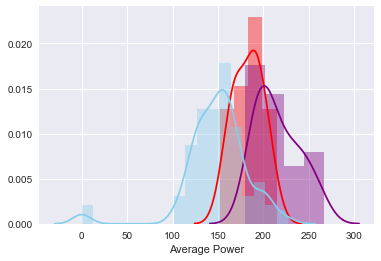

In [26]:
# create histogram
sns.distplot(workout['Average Power'],color= 'red')
sns.distplot(race['Average Power'],color= 'purple')
sns.distplot(ride['Average Power'],color= 'skyblue')

##### NP - normalised power

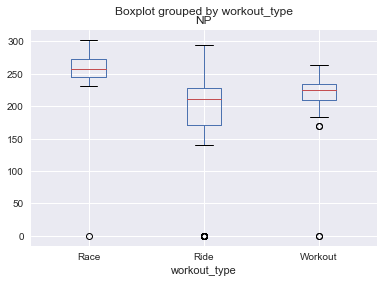

In [27]:
# create boxplot
dfboxplot = df1.boxplot(column=['NP'], by= 'workout_type')

when looking at the box plot above we can see race ride and workout all have outliers at 0 meaning it is likley that we have missing values, this should be cleaned to ensure acurate results. the box plot for race shows a slight positive skew as the upper quartile is slightly longer than the othe quartiles & the median is closer towards the lower portion of the graph, ride is simimilar however it is more exhadurated with a significant positive skew. however its median is closer to the upper range. examining work out the data looks very symetrical with both tails being of similar lengths aswell as a even inner quartile range.

form the histograms below we can see that workout and ride similarly distributed with one large peak and an even spread of data on both sides. race is similar however it has one large peak with another smaller peak. all are close to being normally distributed with no significant skew.

all of the data has similar ranges indicating a minimal difference between the categories for NP.

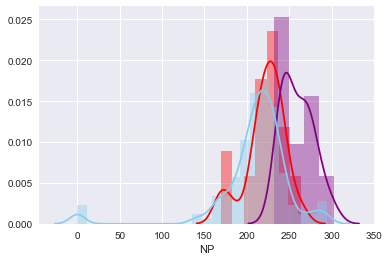

In [28]:
# create histogram
sns.distplot(workout['NP'],color= 'red')
sns.distplot(race['NP'],color= 'purple')
sns.distplot(ride['NP'],color= 'skyblue')

##### Average Speed

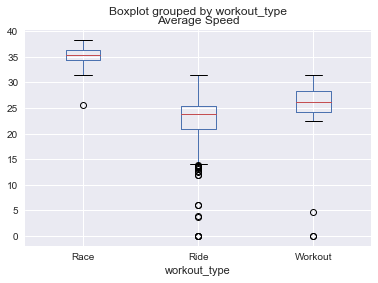

In [29]:
# create boxplot
dfboxplot = df1.boxplot(column=['Average Speed'], by= 'workout_type')

the box plots show some intresting informaition regarding out 3 catagories, race has a very small inner quartile range meaning 50%n of the values are aorund the same value. it also is symetrically distributed, it does have one outlier. ride is particularly intresting as it has a significant amount of outliers this indicates a negitive skew even though the quartiles are symetrically distributed. work out is also symetrically distributed quartile ranges and 2 outliers.

thie histograms tell similar stories, workout seems to be almost normally distributed when ignoring the outliers, race has a very large peak as indicated in the small inner quartile range,it is also slightly higher than the other two variables indicating a higher average speed in a race. ride has the lowest media score, it is also less symetrical then what was implied in the boxplots.

when compared to each other the three categories for average speed differ more than the other varibles discussed. with race having the highest median speed and majority of its data being above race and ride. the last two categores have similar medians but differ in there distribution with workout being significantly more condenceed

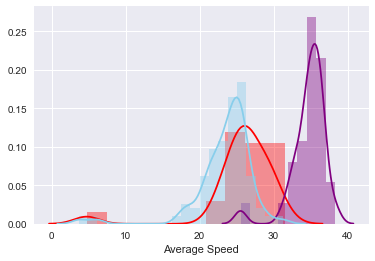

In [30]:
# create histogram
sns.distplot(workout['Average Speed'],color= 'red')
sns.distplot(race['Average Speed'],color= 'purple')
sns.distplot(ride['Average Speed'],color= 'skyblue')

### question 5
* We want to explore relationship between `rides` and `weather`. In order to carry out this analysis, you need `weather` data from relevant source. For your convenience, we have downloaded temperature data from [Bureau of Meterology](http://www.bom.gov.au/). You can find temperature under `Maximum temperature (Degree C)` column which represents maximum temperature for the day. Under the `data` directory, you get `weather_data_2018.csv` and `weather_data_2019.csv` files from where you can read daily temperatures. In order to get temperature for a day so that you can use in your combined dataframe (joining Strava and Cheetah datasets), you need to make `date` column consistent in both dataframes. 
    * Make `date` column consistent across both `weather` and `rides` datasets so that you can get `Maximum temperature` for the day of the ride. 
    * Can you find any relationship between distance travelled per ride and the temperature?
    * Can you find any relatioship between Average speed of ride and the temperature?

In [31]:
# create dataframes for weather data
w2019 = pd.read_csv('data/weather_data_2019.csv',index_col='Year')
w2018 = pd.read_csv('data/weather_data_2018.csv',index_col='Year')

# formate new column for joining
w2018.insert(0, 'date','2018' + '-'+ w2018['Month'].apply(str) +'-'+ w2018['Day'].apply(str))
w2018.index= pd.to_datetime(w2018.date, errors='ignore')
w2019.insert(0, 'date','2019' + '-'+ w2019['Month'].apply(str) +'-'+ w2019['Day'].apply(str))
w2019.index= pd.to_datetime(w2019.date, errors='ignore')

# join weather data with main dataframe
df2=df1
df2.index= pd.to_datetime(df2['date']).dt.date
weather = pd.concat([w2018,w2019])
dfw = df2.join(weather,rsuffix = 'weather',how= 'inner')
weather

,date,Product code,Bureau of Meteorology station number,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
date,,,,,,,,
2018-01-01,2018-1-1,IDCJAC0010,66212,1,1,30.9,1.0,Y
2018-01-02,2018-1-2,IDCJAC0010,66212,1,2,28.8,1.0,Y
2018-01-03,2018-1-3,IDCJAC0010,66212,1,3,25.3,1.0,Y
2018-01-04,2018-1-4,IDCJAC0010,66212,1,4,25.4,1.0,Y
2018-01-05,2018-1-5,IDCJAC0010,66212,1,5,28.9,1.0,Y
...,...,...,...,...,...,...,...,...
2019-12-27,2019-12-27,IDCJAC0010,66212,12,27,30.1,1.0,Y
2019-12-28,2019-12-28,IDCJAC0010,66212,12,28,33.8,1.0,Y
2019-12-29,2019-12-29,IDCJAC0010,66212,12,29,30.7,1.0,Y


###### relationship between distance travelled per ride and the temperature?
as shown in the scatter plot below, we can see there is no relationship between distance and maximum temperature as the line of best fit is horizontal. this is futher backed up by the correlation coefficient (0.00) which also indicates no relationship. therfore maximum temprature is not a good predictor for distance.

0.015474655032152725


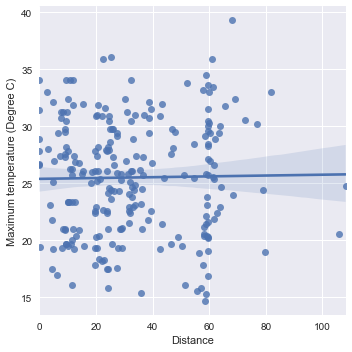

In [32]:
# plot relationship between distance and maximum temperature
sns.lmplot(x= 'Distance',y='Maximum temperature (Degree C)',data=dfw)
c1= dfw['distance']
c2= dfw['Maximum temperature (Degree C)']
cor = c1.corr(c2)
print(cor)

###### relatioship between Average speed of ride and the temperature?
as we can see from the scatter plot there is a weak negitive linear relationship, as there are such large residules we can see that maximum temprature is not a good predictor for average speed. this if further proven when we look at the correlation coefficient (-0.09) this tells us that these two values have a very weak negitive relationship

-0.06268627624726446


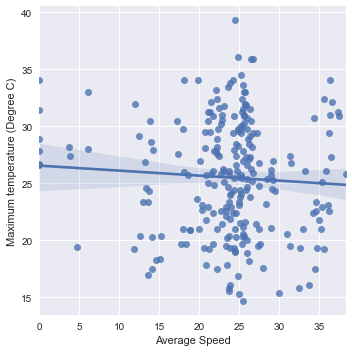

In [33]:
# plot relationship between average speed adn maximun temperature
sns.lmplot(x= 'Average Speed',y='Maximum temperature (Degree C)',data=dfw)
c3= dfw['Average Speed']
c2= dfw['Maximum temperature (Degree C)']
cor1 = c3.corr(c2)
print(cor1)

## Conclusion
In conlusion from this exploration we can see a few main points

* none of the variables of intrest in this report were normally distributed however this could be fixed through a larger sample size
* distance vs TSS & Average power vs NP had a strong positive linear relationships for all three ride types while Average power vs Average speed had positive linear relationship for workout and ride, race had a negitive relationship between the variables.
* the three workout types (race, ride and workout) are usually quite similar in the variables of focus however race often differes from the majority of data
* when looking at the relationship between weather and the two variables Average speed and distance no noticable trends were apparent.

while no noticable trends in data are apparent in these data sets further exploration could expand on the relationships between the variables and how ride type effects them.